In [1]:
#関数定義
#いろいろ準備
#定数、関数など
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt

################################################################################
#エネルギーで考える場合
#betaの計算
def beta(Energy):
    Mc2 = 105.66 #muonの質量
    return np.sqrt(1 - (Mc2 / (Energy))**2)

def bethe01(Energy): #PDG
    K = 0.307 #MeV cm2 /mol
    z = 1 #粒子のcharge
    mec2 = 0.511  # 電子の質量
    Z = 14.2  #空気の平均原子番号
    A = 28.8  #空気の平均質量数 (g/mol)
    I = 34.0e-6  # 平均電離エネルギー (MeV)
    Mc2 = 105.66 #muonの質量
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b)

def bethe02(Energy): #PDG
    rho = 0.001293  #空気の密度 (g/cm³)
    return bethe01(Energy) * rho

def bethe03(Energy): #宇宙線
    K = 0.307 #MeV cm2 /mol
    z = 1 #粒子のcharge
    Z = 14.2  #空気の平均原子番号
    A = 28.8  #空気の平均質量数 (g/mol)
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = b*b
    term3 = Z*(1-b*b)
    return term1 * (10 + np.log( term2*term3 ))

def bethe04(Energy): #宇宙線
    rho = 0.001293  #空気の密度 (g/cm³)
    return bethe03(Energy) * rho


############################################################################
#betaで考える場合
#gammaの計算
def gamma(beta):
    return 1/np.sqrt(1 - beta*beta)

def bethe001(beta): #PDG
    K = 0.307 #MeV cm2 /mol
    z = 1 #粒子のcharge
    mec2 = 0.511  # 電子の質量
    Z = 14.2  #空気の平均原子番号
    A = 28.8  #空気の平均質量数 (g/mol)
    I = 34.0e-6  # 平均電離エネルギー (MeV)
    Mc2 = 105.66 #muonの質量
    b = beta
    g = gamma(beta)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b*g*g/(I*I)
    term3 = (2*mec2*b*b*g*g)/((1 + 2*g*mec2/Mc2 + (mec2/Mc2)**2))
    return term1 * (1/2 * np.log( term2*term3 ) - b*b)

def bethe0011(beta): #PDG
    K = 0.307 #MeV cm2 /mol
    z = 1 #粒子のcharge
    mec2 = 0.511  # 電子の質量
    Z = 14.2  #空気の平均原子番号
    A = 28.8  #空気の平均質量数 (g/mol)
    I = 34.0e-6  # 平均電離エネルギー (MeV)
    Mc2 = 0.511 #muonの質量
    b = beta
    g = gamma(beta)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b*g*g/(I*I)
    term3 = (2*mec2*b*b*g*g)/((1 + 2*g*mec2/Mc2 + (mec2/Mc2)**2))
    return term1 * (1/2 * np.log( term2*term3 ) - b*b)

def bethe002(beta): #PDG
    rho = 0.001293  #空気の密度 (g/cm³)
    return bethe1(beta) * rho

def bethe003(beta): #宇宙線
    K = 0.307 #MeV cm2 /mol
    z = 1 #粒子のcharge
    Z = 14.2  #空気の平均原子番号
    A = 28.8  #空気の平均質量数 (g/mol)
    b = beta
    term1 = K*z*z*Z/A/b/b
    term2 = b*b
    term3 = Z*(1-b*b)
    return term1 * (10 + np.log( term2*term3 ))

def bethe004(beta): #宇宙線
    rho = 0.001293  #空気の密度 (g/cm³)
    return bethe3(beta) * rho

############################################################################
#清書版
def bethe1(beta): #PDG muon ふつうの電離損失の式
    K = 0.307 #MeV cm2 /mol
    z = 1 #粒子のcharge
    mec2 = 0.511  # 電子の質量
    Z = 14.2  #空気の平均原子番号
    A = 28.8  #空気の平均質量数 (g/mol)
    I = 34.0e-6  # 平均電離エネルギー (MeV)
    Mc2 = 105.66 #muonの質量
    b = beta
    g = gamma(beta)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b*g*g/(I*I)
    term3 = (2*mec2*b*b*g*g)/((1 + 2*g*mec2/Mc2 + (mec2/Mc2)**2))
    return term1 * (1/2 * np.log( term2*term3 ) - b*b)

def bethe2(beta): #PDG　電子　ふつうの電離損失の式
    K = 0.307 #MeV cm2 /mol
    z = 1 #粒子のcharge
    mec2 = 0.511  # 電子の質量
    Z = 14.2  #空気の平均原子番号
    A = 28.8  #空気の平均質量数 (g/mol)
    I = 34.0e-6  # 平均電離エネルギー (MeV)
    Mc2 = 0.511 #muonの質量
    b = beta
    g = gamma(beta)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b*g*g/(I*I)
    term3 = (2*mec2*b*b*g*g)/((1 + 2*g*mec2/Mc2 + (mec2/Mc2)**2))
    return term1 * (1/2 * np.log( term2*term3 ) - b*b)


def bethe3(beta): #宇宙線, 電子の電離損失の式
    b = beta
    pi = np.pi
    I = 34.0e-6  # 平均電離エネルギー (MeV)
    mec2 = 0.511
    #e = 1.602e-19
    N = const.Avogadro  #アボガドロ数 (/mol)
    gamma = 1/np.sqrt(1-b*b)
    g = gamma
    E = 1 #(g-1)*mec2 #ここ、入射電子じゃなくて、原子の電子の運動エネルギーということ？
    re = 2.818e-13 # = e2/mec2 = 古典電子半径
    term1 = 2*pi*re*re*N*mec2/b/b
    term2 = mec2*b*b*E*g*g/2/I
    term3 = 2*(2*np.sqrt(1-b*b) - 1 + b*b)
    return term1 * (np.log(term2)-np.log(term3) + 1-b*b)

def bethe4(beta): #PDG, 最確値の式
    K = 0.307 #MeV cm2 /mol
    z = 1 #粒子のcharge
    mec2 = 0.511  # 電子の質量
    Z = 14.2  #空気の平均原子番号
    A = 28.8  #空気の平均質量数 (g/mol)
    I = 34.0e-6  # 平均電離エネルギー (MeV)
    Mc2 = 0.511 #muonの質量
    b = beta
    g = gamma(beta)
    j = 0.200
    gsi = K/2*Z/A*z*z*1/b/b
    term2 = 2*mec2*b*b*g*g/(I*I)
    term3 = gsi/I
    return gsi*(np.log(term2) + np.log(term3) + j - b*b)

###################################################################

#%%

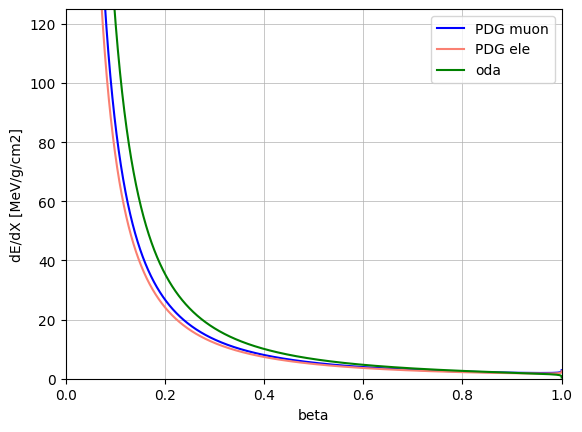

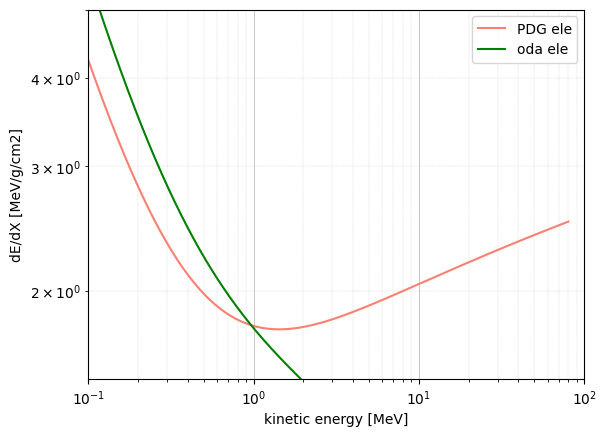

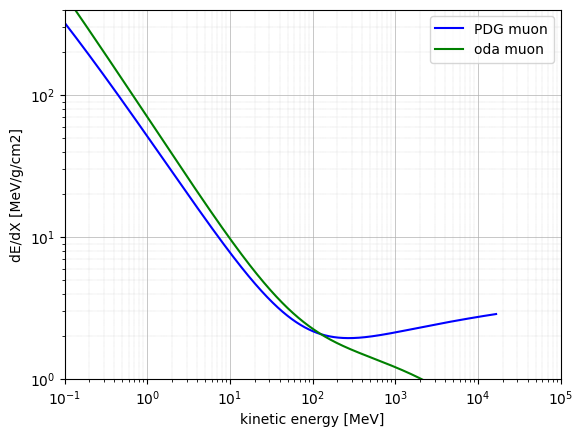

小田宇宙線の式の方が、PDGより少し傾きが急
PDG muonとeleはほぼ全く違いない
小田宇宙線の式で問題ないようにも見えるが、kinetic energyで見ると関数形が結構違う
今後はPDGの式を採用する(ele,muonで若干の違いあり)


In [2]:
#電離損失：PDG vs 宇宙線
#PDGのグラフと宇宙線のグラフの比較(たぶんそんな変わらん)
#0.  PDGの式と、宇宙線の式での電離損失vs betaのグラフ(1種類でいい、その後どっちか片方使う)
#00. PDGの式と、宇宙線の式での電離損失vs kinetic energy(ele)を書いて、右上がりになるか見る
x_beta = []
x_energy_muon = []
x_energy_ele = []
y_bethe1 = []
y_bethe11 = []
y_bethe3 = []
y_bethe2 = []
y_bethe = []


# def bethe(Energy):
#     def beta(Energy):
#         return np.sqrt(1 - (Mc2 / (Energy))**2)
#     K = 0.307 #MeV cm2 /mol
#     z = 1 #粒子のcharge
#     mec2 = 0.511  # 電子の質量
#     Z = 14.2  #空気の平均原子番号
#     A = 28.8  #空気の平均質量数 (g/mol)
#     I = 34.0e-6  # 平均電離エネルギー (MeV)
#     Mc2 = 0.511 #muonの質量
#     b = beta(Energy)
#     term1 = K*z*z*Z/A/b/b
#     term2 = 2*mec2*b*b/((1-b*b)*I*I)
#     term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
#     #print(f"log argument: {term2 * term3}")
#     return term1 * (1/2 * np.log( term2*term3 ) - b*b)



for i in range(1000, 99999, 1):
    xi = i/100000
    x_beta.append(xi)
    x_energy_muon.append((1/np.sqrt(1-xi*xi) - 1)*105.66)
    x_energy_ele.append((1/np.sqrt(1-xi*xi) - 1)*0.511)
    y_bethe1.append(bethe001(xi))
    y_bethe11.append(bethe0011(xi))
    y_bethe3.append(bethe003(xi))
    y_bethe2.append(bethe2(xi))
    #y_bethe.append(bethe(x_energy_ele[-1]+0.511))

plt.plot(x_beta, y_bethe1, label="PDG muon", color = 'blue')
plt.plot(x_beta, y_bethe11, label="PDG ele", color = 'salmon')
plt.plot(x_beta, y_bethe3, label="oda", color = 'green')
#plt.plot(x_beta, y_bethe2, label="ele")
plt.xlabel("beta") 
plt.ylabel("dE/dX [MeV/g/cm2]")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0, 1.0)
plt.ylim(0, 125)
plt.legend()
plt.grid() 
#plt.xscale('log')
#plt.yscale('log')
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle=":", linewidth=0.3)
plt.show()

#plt.plot(x_energy_muon, y_bethe1, label="PDG muon")
plt.plot(x_energy_ele, y_bethe11, label="PDG ele", color = 'salmon')
#plt.plot(x_energy_muon, y_bethe3, label="oda muon")
plt.plot(x_energy_ele, y_bethe3, label="oda ele", color = 'green')
#plt.plot(x_energy_ele, y_bethe, label="presence")
#plt.plot(x_beta, y_bethe2, label="ele")
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("dE/dX [MeV/g/cm2]")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0.1, 100)
plt.ylim(1.5, 5)
plt.legend()
plt.grid() 
plt.xscale('log')
plt.yscale('log')
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle=":", linewidth=0.3)

plt.show()


plt.plot(x_energy_muon, y_bethe1, label="PDG muon", color = 'blue')
#plt.plot(x_energy_ele, y_bethe11, label="PDG ele")
plt.plot(x_energy_muon, y_bethe3, label="oda muon", color = 'green')
#plt.plot(x_energy_ele, y_bethe3, label="oda ele")
#plt.plot(x_energy_ele, y_bethe, label="presence")
#plt.plot(x_beta, y_bethe2, label="ele")
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("dE/dX [MeV/g/cm2]")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0.1, 100000)
plt.ylim(1, 400)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle=":", linewidth=0.3)
plt.show()


print("小田宇宙線の式の方が、PDGより少し傾きが急")
print("PDG muonとeleはほぼ全く違いない")
print("小田宇宙線の式で問題ないようにも見えるが、kinetic energyで見ると関数形が結構違う")
print("今後はPDGの式を採用する(ele,muonで若干の違いあり)")

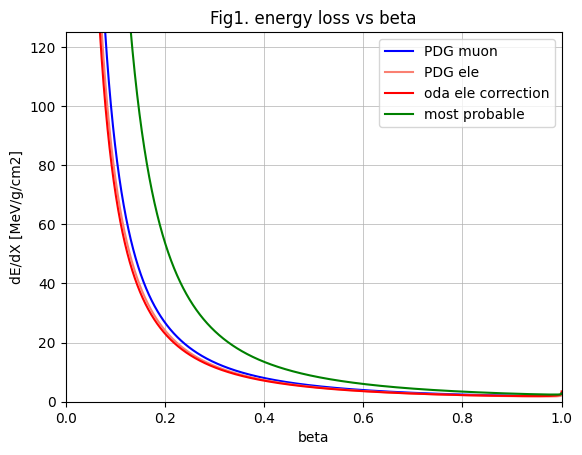

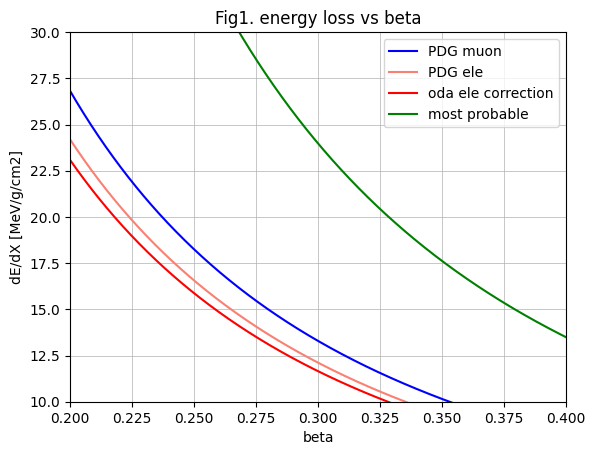

電子補正はnormalより電離損失が小さい


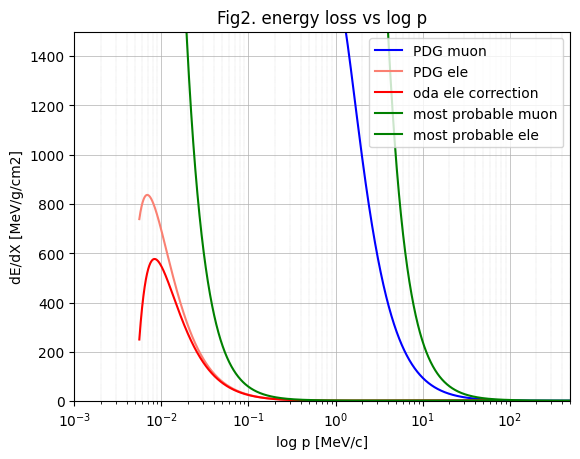

ちゃんと平行移動の関係になってる


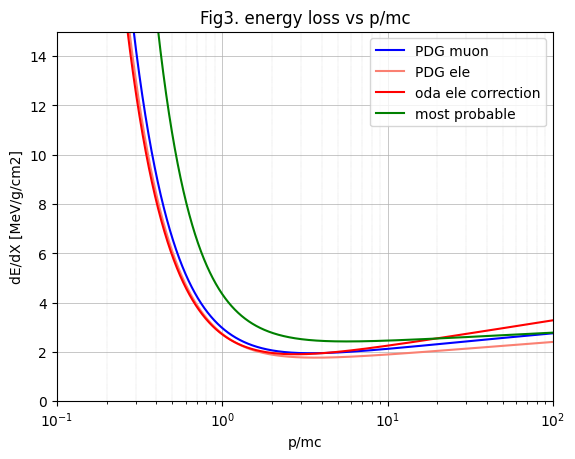

most probableが電離損失大きいのあってる？？
電子補正は思ってたより効かないっぽい
とりあえず、一旦PDG muonの式のまま考えてみる


In [3]:
#電離損失：いろいろ比較
#とりあえず電離損失のグラフを書いて、理論の差を見てみる
#1.  電離損失vs betaのグラフ(電子、ミューオン、補正電子、最確値の3つ)
#2.  電離損失vs logpのグラフ(電子、ミューオン、補正電子、最確値の3つ)
#3.  電離損失vs p/mcのグラフ(ふつう、補正電子、最確値の3つ)(PDG Fig34.1)
x_beta = []
x_p_mc = []
x_pmuon = []
x_pele = []
y_bethe1 = []
y_bethe2 = []
y_bethe3 = []
y_bethe4 = []

def pmc2(beta):
    gamma = 1/np.sqrt(1-beta*beta)
    return beta*gamma

for i in range(1090, 99999, 1):
    xi = i/100000
    x_beta.append(xi)
    x_pele.append(pmc2(xi)*0.511)
    x_pmuon.append(pmc2(xi)*105.66)
    x_p_mc.append(pmc2(xi))
    y_bethe1.append(bethe1(xi))
    y_bethe2.append(bethe2(xi))
    y_bethe3.append(bethe3(xi))
    y_bethe4.append(bethe4(xi))

plt.plot(x_beta, y_bethe1, label="PDG muon", color = 'blue')
plt.plot(x_beta, y_bethe2, label="PDG ele", color = 'salmon')
plt.plot(x_beta, y_bethe3, label="oda ele correction", color = 'red')
plt.plot(x_beta, y_bethe4, label="most probable", color = 'green')
plt.xlabel("beta")
plt.ylabel("dE/dX [MeV/g/cm2]")
plt.title("Fig1. energy loss vs beta")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0, 1.0)
plt.ylim(0, 125)
plt.legend()
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle=":", linewidth=0.3)
plt.show()

plt.plot(x_beta, y_bethe1, label="PDG muon", color = 'blue')
plt.plot(x_beta, y_bethe2, label="PDG ele", color = 'salmon')
plt.plot(x_beta, y_bethe3, label="oda ele correction", color = 'red')
plt.plot(x_beta, y_bethe4, label="most probable", color = 'green')
plt.xlabel("beta")
plt.ylabel("dE/dX [MeV/g/cm2]")
plt.title("Fig1. energy loss vs beta")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0.2, 0.4)
plt.ylim(10, 30)
plt.legend()
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle=":", linewidth=0.3)
plt.show()
print("電子補正はnormalより電離損失が小さい")


plt.plot(x_pmuon, y_bethe1, label="PDG muon", color = 'blue')
plt.plot(x_pele, y_bethe2, label="PDG ele", color = 'salmon')
plt.plot(x_pele, y_bethe3, label="oda ele correction", color = 'red')
plt.plot(x_pmuon, y_bethe4, label="most probable muon", color = 'green')
plt.plot(x_pele, y_bethe4, label="most probable ele", color = 'green')
plt.xlabel("log p [MeV/c]")
plt.ylabel("dE/dX [MeV/g/cm2]")
plt.title("Fig2. energy loss vs log p")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0.001, 500.0)
plt.ylim(0, 1500)
plt.legend()
plt.xscale('log')
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle=":", linewidth=0.3)
plt.show()
print("ちゃんと平行移動の関係になってる")

plt.plot(x_p_mc, y_bethe1, label="PDG muon", color = 'blue')
plt.plot(x_p_mc, y_bethe2, label="PDG ele", color = 'salmon')
plt.plot(x_p_mc, y_bethe3, label="oda ele correction", color = 'red')
plt.plot(x_p_mc, y_bethe4, label="most probable", color = 'green')
plt.xlabel("p/mc")
plt.ylabel("dE/dX [MeV/g/cm2]")
plt.title("Fig3. energy loss vs p/mc")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0.1, 100)
plt.ylim(0, 15)
plt.legend()
plt.xscale('log')
#plt.yscale('log')
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle=":", linewidth=0.3)
plt.show()
print("most probableが電離損失大きいのあってる？？")
print("電子補正は思ってたより効かないっぽい")
print("とりあえず、一旦PDG muonの式のまま考えてみる")


In [4]:
#関数定義
#積分する関数など
# def stop(Energy):
#     x = 0
#     dx = 0.01
#     for i in range(1000000):
#         x += dx
#         de = bethe1(Energy) * dx
#         Energy -= de
#         if Energy <= Mc2+0.002: #ここに0.001とか追加すると変なピークが消える
#             break
#     return x

def range_in_air(beta):
    x = 0
    dx = 0.1
    mc2 = 105.66
    #rho = 0.001293
    rho = 1

    def Energy(beta):
        b = beta
        return  (1/np.sqrt(1-b*b) - 1)*mc2
    def Beta(Energy):
        E = Energy
        return np.sqrt(1-(mc2/(E+mc2))*(mc2/(E+mc2)))
    
    E = Energy(beta)

    for i in range(20000):
        x += dx
        de = bethe1(beta) * rho * dx
        E -= de
        beta = Beta(E)
        if E <= 0.02: #ここに0.001とか追加すると変なピークが消える
            break
    return x

def range_in_air01(beta):
    x = 0
    dx = 0.001
    mc2 = 0.511
    #rho = 0.001293
    rho = 1

    def Energy(beta):
        b = beta
        return  (1/np.sqrt(1-b*b) - 1)*mc2
    def Beta(Energy):
        E = Energy
        return np.sqrt(1-(mc2/(E+mc2))*(mc2/(E+mc2)))
    
    E = Energy(beta)

    for i in range(20000):
        x += dx
        de = bethe3(beta) * rho * dx
        E -= de
        beta = Beta(E)
        if E <= 0.02: #ここに0.001とか追加すると変なピークが消える
            break
    return x


def range_in_air2(beta):
    x = 0
    dx = 0.001 #stepを細かくした
    mc2 = 105.66
    #rho = 0.001293
    rho = 1

    def Energy(beta):
        b = beta
        return  (1/np.sqrt(1-b*b) - 1)*mc2
    def Beta(Energy):
        E = Energy
        return np.sqrt(1-(mc2/(E+mc2))*(mc2/(E+mc2)))
    
    E = Energy(beta)

    for i in range(20000): #rangeはそんなに多くしてない
        x += dx
        de = bethe1(beta) * rho * dx
        E -= de
        beta = Beta(E)
        if E <= 0.02: #ここに0.001とか追加すると変なピークが消える
            break
    return x

def range_in_air02(beta):
    x = 0
    dx = 0.00001 #stepを細かくした
    mc2 = 0.511
    #rho = 0.001293
    rho = 1

    def Energy(beta):
        b = beta
        return  (1/np.sqrt(1-b*b) - 1)*mc2
    def Beta(Energy):
        E = Energy
        return np.sqrt(1-(mc2/(E+mc2))*(mc2/(E+mc2)))
    
    E = Energy(beta)

    for i in range(20000): #rangeはそんなに多くしてない
        x += dx
        de = bethe1(beta) * rho * dx
        E -= de
        beta = Beta(E)
        if E <= 0.02: #ここに0.001とか追加すると変なピークが消える
            break
    return x

C:\Users\kmana\AppData\Local\Temp\ipykernel_29728\2003404945.py:26: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-(mc2/(E+mc2))*(mc2/(E+mc2)))
C:\Users\kmana\AppData\Local\Temp\ipykernel_29728\2003404945.py:51: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-(mc2/(E+mc2))*(mc2/(E+mc2)))


0.00010000000050000002
0.0001
0.00010000000050000002


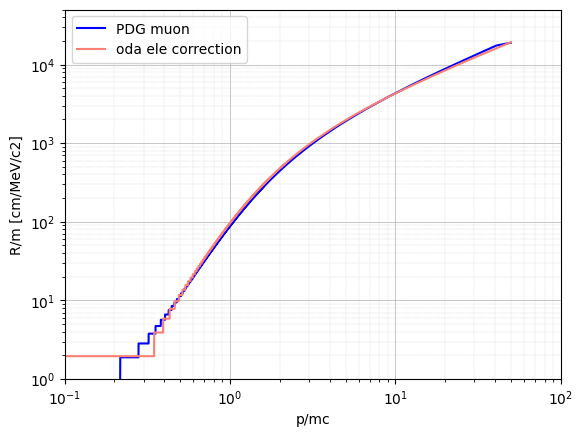

In [5]:
#電離損失：飛程のグラフ
#飛程のグラフを書いてみる
#6.  積分して求めた、R/m vs E/mのグラフ(ふつう、)
#7.  積分して求めた、R/m vs p/mcのグラフ(ふつう、補正電子、最確値の2つ)(PDG Fig34.4)

x_beta = []
x_e_m = []
x_p_mc = []
y_R_m = []
y_R_m_ele = []

def e_m(beta):
    b = beta
    return (1/np.sqrt(1-b*b) - 1)
def p_mc(beta):
    b = beta
    return b/np.sqrt(1-b*b)

for i in range(1, 9999, 1):
    bi = i/10000
    x_beta.append(bi)
    x_e_m.append(e_m(bi))
    x_p_mc.append(p_mc(bi))
    y_R_m.append(range_in_air(bi)/0.10566)
    y_R_m_ele.append(range_in_air01(bi)/0.000511)
print(x_p_mc[0])
print(x_beta[0])
print(p_mc(x_beta[0]))



# plt.plot(x_e_m, y_R_m) 
# plt.xlabel("E/m [/c2]") 
# plt.ylabel("R/m [cm/MeV/c2]")
# plt.axhline(0, color="black", linewidth=0.5)
# plt.axvline(0, color="black", linewidth=0.5) 
# #plt.xlim(0, 0.5)
# #plt.ylim(0, 20)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.grid() 
# plt.show()


plt.plot(x_p_mc, y_R_m, color = 'blue', label='PDG muon') 
plt.plot(x_p_mc, y_R_m_ele, color = 'salmon', label = 'oda ele correction')
plt.xlabel("p/mc") 
plt.ylabel("R/m [cm/MeV/c2]")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0.1, 100)
plt.ylim(1, 50000)
plt.xscale('log')
plt.yscale('log')
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle=":", linewidth=0.3)
plt.legend()
plt.show()

C:\Users\kmana\AppData\Local\Temp\ipykernel_29728\2003404945.py:77: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-(mc2/(E+mc2))*(mc2/(E+mc2)))
C:\Users\kmana\AppData\Local\Temp\ipykernel_29728\2003404945.py:102: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-(mc2/(E+mc2))*(mc2/(E+mc2)))


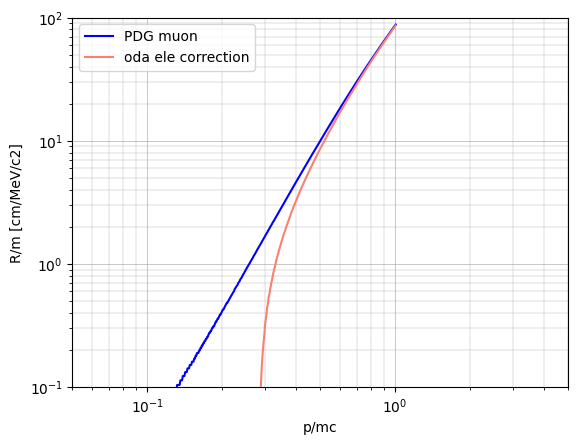

In [6]:
#電離損失：飛程のグラフ(範囲調整)
x_beta = []
x_e_m = []
x_p_mc = []
y_R_m = []
y_R_m_ele = []

def e_m(beta):
    b = beta
    return (1/np.sqrt(1-b*b) - 1)
def p_mc(beta):
    b = beta
    return b/np.sqrt(1-b*b)

for i in range(1, 710, 1):
    bi = i/1000
    x_beta.append(bi)
    x_e_m.append(e_m(bi))
    x_p_mc.append(p_mc(bi))
    y_R_m.append(range_in_air2(bi)/0.10566)
    y_R_m_ele.append(range_in_air02(bi)/0.000511)

plt.plot(x_p_mc, y_R_m, color = 'blue',label = 'PDG muon')
plt.plot(x_p_mc, y_R_m_ele, color = 'salmon', label = 'oda ele correction') 
plt.xlabel("p/mc") 
plt.ylabel("R/m [cm/MeV/c2]")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
#plt.xlim(0.1, 1)
#plt.ylim(1, 100)
plt.xlim(0.05, 5)
plt.ylim(0.1, 100)
plt.xscale('log')
plt.yscale('log')
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle="-", linewidth=0.3)
plt.legend()
plt.show()

ここの計算でf1とf2が分かれてなかったから、土曜日に直した

In [8]:
#多重散乱：測定値の処理
#測定値の処理など
import numpy as np
from scipy.optimize import fsolve

x_list = [3.41, 12.95, 5.68, 1.59, 7.27, 6.82, 6.36, 10.68, 8.86, 5.91, 15.23, 10.68, 10.00, 11.82, 10.91]
theta_list = [0.59, 0.19, 0.84, 1.01, 0.59, 0.96, 0.30, 1.12, 0.21, 0.12, 0.23, 0.002, 0.07, 0.09, 0.10]
x_muon_list = [15.23, 10.68, 10.00, 11.82, 10.91]
theta_muon_list = [0.23, 0.002, 0.07, 0.09, 0.10]

def f1(beta):
    mc2 = 0.511
    z = 1
    X0 = 30050
    return 13.6/mc2 * np.sqrt(1-beta*beta) / beta / beta * z * np.sqrt(x/X0) * (1 + 0.038*np.log(x*z*z/(X0*beta*beta))) - theta

def f2(beta):
    mc2 = 105.66
    z = 1
    X0 = 30050
    return 13.6/mc2 * np.sqrt(1-beta*beta) / beta / beta * z * np.sqrt(x/X0) * (1 + 0.038*np.log(x*z*z/(X0*beta*beta))) - theta


def f3(p):
    beta = 1.0
    z = 1
    X0 = 30050
    return 13.6/ p * z * np.sqrt(x/X0) * (1.0 + 0.038*np.log(x*z*z/(X0*beta*beta))) - theta


beta_ele_list = []
beta_muon_list = []
p_ele_list_mc = []
p_muon_list_mc = []
pb_ele_mc = []
pb_muon_mc = []


for i in range(0, 15, 1):
    x = x_list[i]
    theta = theta_list[i]
    initial_guess = 0.1 
    beta_ans = fsolve(f1, initial_guess)
    p_ans = fsolve(f3, initial_guess)
    beta_ele_list.append(beta_ans[0])
    pb_ele_mc.append(beta_ans[0]/np.sqrt(1-beta_ans[0]*beta_ans[0]))
    p_ele_list_mc.append(p_ans[0]/0.511)
    #print(i+1, "p:", p_ans[0], "beta_ele:", beta_ans[0])

for i in range(0, 5, 1):
    x = x_muon_list[i]
    theta = theta_muon_list[i]
    initial_guess = 0.1 
    beta_ans = fsolve(f2, initial_guess)
    p_ans = fsolve(f3, initial_guess)
    beta_muon_list.append(beta_ans[0])
    pb_muon_mc.append(beta_ans[0]/np.sqrt(1-beta_ans[0]*beta_ans[0]))
    p_muon_list_mc.append(p_ans[0]/105.66)
    #print(i+1, "p:", p_ans[0], "beta_muon:", beta_ans[0])

C:\Users\kmana\AppData\Local\Temp\ipykernel_29728\7599258.py:15: RuntimeWarning: invalid value encountered in sqrt
  return 13.6/mc2 * np.sqrt(1-beta*beta) / beta / beta * z * np.sqrt(x/X0) * (1 + 0.038*np.log(x*z*z/(X0*beta*beta))) - theta
C:\Users\kmana\AppData\Local\Temp\ipykernel_29728\7599258.py:43: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  beta_ans = fsolve(f1, initial_guess)


5
5


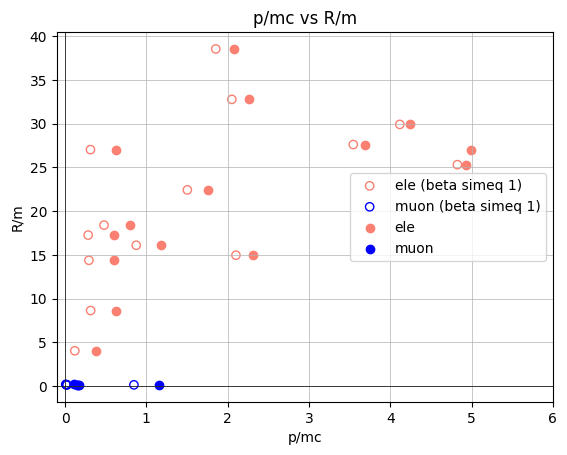

muonとeleはほぼ完璧に重なってる、計算ok


In [17]:
#多重散乱：測定値のプロット
#測定値の処理の差を見てみる
#9.  p目的に取り出した測定値scatter(p)
#10. beta目的に、質量で分けて取り出した測定値scatter(beta)
#11. 両方重ねたグラフ
# x_list = [3.41, 12.95, 5.68, 1.59, 7.27, 6.82, 6.36, 10.68, 8.86, 5.91, 15.23, 10.68, 10.00, 11.82, 10.91]
# theta_list = [0.59, 0.19, 0.84, 1.01, 0.59, 0.96, 0.30, 1.12, 0.21, 0.12, 0.23, 0.002, 0.07, 0.09, 0.10]
# x_muon_list = [15.23, 10.68, 10.00, 11.82, 10.91]
# theta_muon_list = [0.23, 0.002, 0.07, 0.09, 0.10]
# beta_ele_list
# beta_muon_list
# p_list
# p_muon_list
# pb_ele_mc = []
# pb_muon_mc = []

rho = 0.001293
mec2 = 0.000511
Mc2 = 0.10466

R_m_ele = [i*rho/mec2 for i in x_list]
R_m_muon = [i*rho/Mc2 for i in x_muon_list]

print(len(pb_muon_mc))
print(len(x_muon_list))

import matplotlib.pyplot as plt
plt.scatter(p_ele_list_mc, R_m_ele, label = 'ele (beta simeq 1)',edgecolors="salmon", facecolors="none")
plt.scatter(p_muon_list_mc, R_m_muon, label = 'muon (beta simeq 1)',edgecolors="blue", facecolors="none")
plt.scatter(pb_ele_mc, R_m_ele, label = 'ele', color = 'salmon')
plt.scatter(pb_muon_mc, R_m_muon, label = 'muon', color = 'blue')
plt.xlabel("p/mc") 
plt.ylabel("R/m")
plt.title("p/mc vs R/m")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(-0.1, 6)
#plt.ylim(0, 16)
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle="-", linewidth=0.3)
plt.legend()
plt.show()

print("muonとeleはほぼ完璧に重なってる、計算ok")

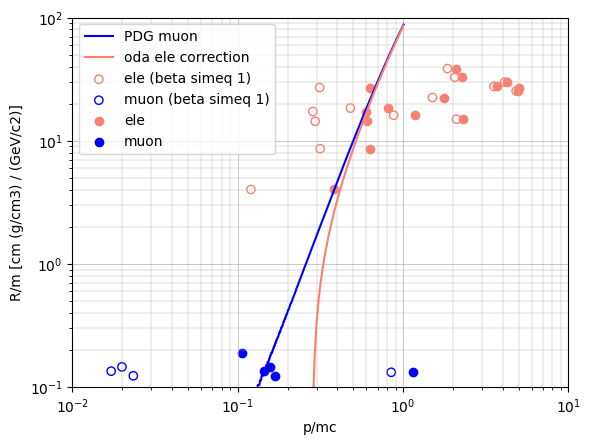

まあオーダーは近い...?


In [10]:
#測定値と理論値のプロット
#飛程のグラフと測定値を重ねてみる
#12. R vs pのグラフ(電子、ミューオンの2つ)
#13. R vs pのグラフに、測定値scatter(p)を重ねる
#14. R vs pのグラフに、測定値scatter(beta)
plt.plot(x_p_mc, y_R_m, color = 'blue',label = 'PDG muon')
plt.plot(x_p_mc, y_R_m_ele, color = 'salmon', label = 'oda ele correction') 
plt.scatter(p_ele_list_mc, R_m_ele, label = 'ele (beta simeq 1)',edgecolors="salmon", facecolors="none")
plt.scatter(p_muon_list_mc, R_m_muon, label = 'muon (beta simeq 1)',edgecolors="blue", facecolors="none")
plt.scatter(pb_ele_mc, R_m_ele, label = 'ele', color = 'salmon')
plt.scatter(pb_muon_mc, R_m_muon, label = 'muon', color = 'blue')
plt.xlabel("p/mc") 
plt.ylabel("R/m [cm (g/cm3) / (GeV/c2)]")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0.01, 10)
plt.ylim(0.1, 100)
plt.xscale('log')
plt.yscale('log')
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle="-", linewidth=0.3)
plt.legend()
plt.show()

print("まあオーダーは近い...?")

In [11]:
#多重散乱：斜め入射補正
#測定値の処理など2(ななめ入射補正)
# x_list = [3.41, 12.95, 5.68, 1.59, 7.27, 6.82, 6.36, 10.68, 8.86, 5.91, 15.23, 10.68, 10.00, 11.82, 10.91]
# theta_list = [0.59, 0.19, 0.84, 1.01, 0.59, 0.96, 0.30, 1.12, 0.21, 0.12, 0.23, 0.002, 0.07, 0.09, 0.10]
# 感度層は5cmとする

#psiは天頂角
psi_max = [90/360*2*np.pi for i in x_list] 
psi_min = [np.arctan(i/5) for i in x_list]

#muonの平均xはcos^2(psi)の平均値を使って、それぞれxcos(psi)で決める
#eleの平均xはcos(psi)の平均値を使って、それぞれxcos(psi)で決める
#各cos(psi)の平均値を求める
import scipy.integrate as integrate
ave_cos = []
x_cos = []

ave_cos2 = []
x_cos2 = []

def f(x):
    return np.cos(np.pi/2 - x)
def f2(x):
    return np.cos(np.pi/2 - x)*np.cos(x)*np.cos(x)
def f3(x):
    return np.cos(x)*np.cos(x)

for i in range(len(psi_min)):
    min = psi_min[i]
    max = psi_max[i]
    ave_cos.append((1/(max - min)) * integrate.quad(f,min,max)[0])
    x_cos.append(x_list[i]/ave_cos[i])

for i in range(10, 15, 1):
    min = psi_min[i]
    max = psi_max[i]
    ave_cos2.append((1/(max - min)) * integrate.quad(f2,min,max)[0])
    cos2 = (1/(max - min)) * integrate.quad(f3,min,max)[0]
    x_cos2.append(x_list[i]/(ave_cos2[-1]/cos2))

print(x_cos)
print(x_cos2)

R_m_ele_psi = [i*rho/mec2 for i in x_cos]
R_m_muon_psi = [i*rho/Mc2 for i in x_cos2]

[np.float64(4.013017073651144), np.float64(13.247741059524362), np.float64(6.204948105430751), np.float64(2.107109858806148), np.float64(7.72915100921385), np.float64(7.297080287231586), np.float64(6.856079356288985), np.float64(11.029049242850618), np.float64(9.262145890687057), np.float64(6.425129005686598), np.float64(15.488448419835123), np.float64(11.029049242850618), np.float64(10.367475713310458), np.float64(12.141488200174027), np.float64(11.253166909639205)]
[np.float64(15.699277867686941), np.float64(11.318902752379158), np.float64(10.674028524834746), np.float64(12.406807529261783), np.float64(11.537741622551946)]


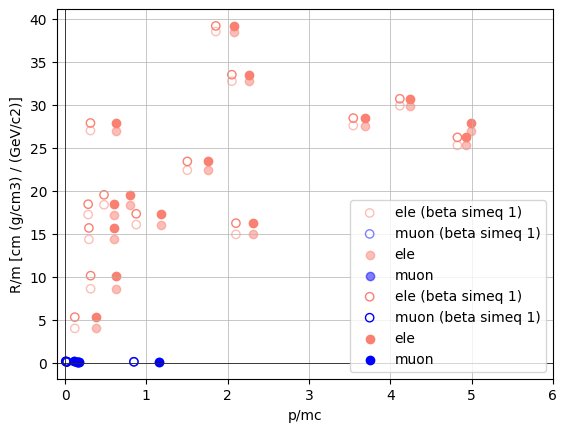

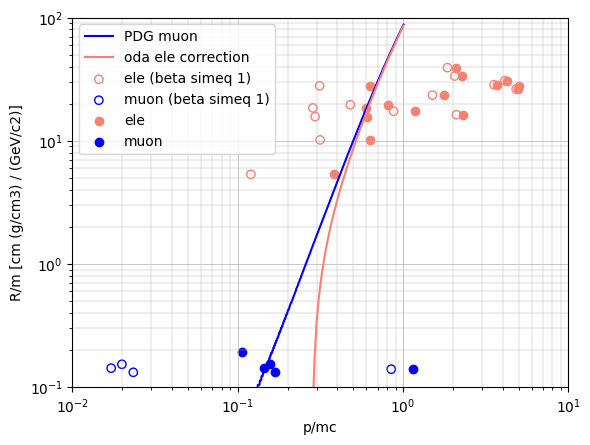

そんな変わらん


In [18]:
#多重散乱：測定値のプロット２
#飛程が小さすぎるところの補正(ななめ入射をする
#15. R/m vs p/mcのグラフに、測定値を角度補正したscatter(p)、scatter(beta)を重ねる


# plt.plot(x_p_mc, y_R_m, color = 'blue',label = 'PDG muon')
# plt.plot(x_p_mc, y_R_m_ele, color = 'salmon', label = 'oda ele correction') 
plt.scatter(p_ele_list_mc, R_m_ele, label = 'ele (beta simeq 1)',edgecolors="salmon", facecolors="none", alpha = 0.5)
plt.scatter(p_muon_list_mc, R_m_muon, label = 'muon (beta simeq 1)',edgecolors="blue", facecolors="none", alpha = 0.5)
plt.scatter(pb_ele_mc, R_m_ele, label = 'ele', color = 'salmon', alpha = 0.5)
plt.scatter(pb_muon_mc, R_m_muon, label = 'muon', color = 'blue', alpha = 0.5)
plt.scatter(p_ele_list_mc, R_m_ele_psi, label = 'ele (beta simeq 1)',edgecolors="salmon", facecolors="none")
plt.scatter(p_muon_list_mc, R_m_muon_psi, label = 'muon (beta simeq 1)',edgecolors="blue", facecolors="none")
plt.scatter(pb_ele_mc, R_m_ele_psi, label = 'ele', color = 'salmon')
plt.scatter(pb_muon_mc, R_m_muon_psi, label = 'muon', color = 'blue')
plt.xlabel("p/mc") 
plt.ylabel("R/m [cm (g/cm3) / (GeV/c2)]")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(-0.1, 6)
# plt.ylim(0.1, 100)
# plt.xscale('log')
# plt.yscale('log')
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle="-", linewidth=0.3)
plt.legend()
plt.show()



plt.plot(x_p_mc, y_R_m, color = 'blue',label = 'PDG muon')
plt.plot(x_p_mc, y_R_m_ele, color = 'salmon', label = 'oda ele correction') 
# plt.scatter(p_ele_list_mc, R_m_ele, label = 'ele (beta simeq 1)',edgecolors="salmon", facecolors="none", alpha = 0.5)
# plt.scatter(p_muon_list_mc, R_m_muon, label = 'muon (beta simeq 1)',edgecolors="blue", facecolors="none", alpha = 0.5)
# plt.scatter(pb_ele_mc, R_m_ele, label = 'ele', color = 'salmon', alpha = 0.5)
# plt.scatter(pb_muon_mc, R_m_muon, label = 'muon', color = 'blue', alpha = 0.5)
plt.scatter(p_ele_list_mc, R_m_ele_psi, label = 'ele (beta simeq 1)',edgecolors="salmon", facecolors="none")
plt.scatter(p_muon_list_mc, R_m_muon_psi, label = 'muon (beta simeq 1)',edgecolors="blue", facecolors="none")
plt.scatter(pb_ele_mc, R_m_ele_psi, label = 'ele', color = 'salmon')
plt.scatter(pb_muon_mc, R_m_muon_psi, label = 'muon', color = 'blue')
plt.xlabel("p/mc") 
plt.ylabel("R/m [cm (g/cm3) / (GeV/c2)]")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0.01, 10)
plt.ylim(0.1, 100)
plt.xscale('log')
plt.yscale('log')
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle="-", linewidth=0.3)
plt.legend()
plt.show()

print("そんな変わらん")

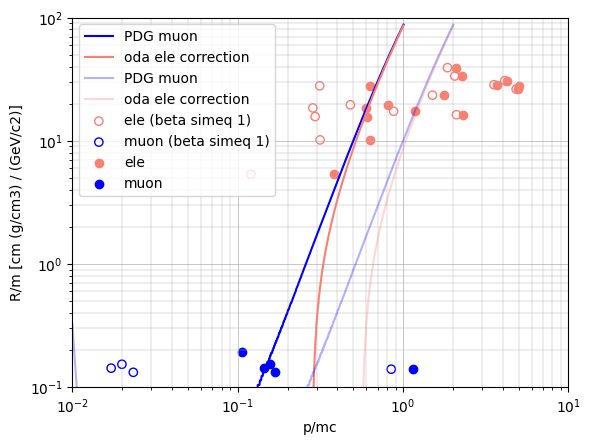

最確値の影響でグラフが右にずれたらなんか変わるかなあ...


In [13]:
#多重散乱：測定値のプロット２
x_p_mc_mp = [i*2 for i in x_p_mc]

plt.plot(x_p_mc, y_R_m, color = 'blue',label = 'PDG muon')
plt.plot(x_p_mc, y_R_m_ele, color = 'salmon', label = 'oda ele correction') 
plt.plot(x_p_mc_mp, y_R_m, color = 'blue',label = 'PDG muon', alpha = 0.3)
plt.plot(x_p_mc_mp, y_R_m_ele, color = 'salmon', label = 'oda ele correction', alpha = 0.3) 
# plt.scatter(p_ele_list_mc, R_m_ele, label = 'ele (beta simeq 1)',edgecolors="salmon", facecolors="none", alpha = 0.5)
# plt.scatter(p_muon_list_mc, R_m_muon, label = 'muon (beta simeq 1)',edgecolors="blue", facecolors="none", alpha = 0.5)
# plt.scatter(pb_ele_mc, R_m_ele, label = 'ele', color = 'salmon', alpha = 0.5)
# plt.scatter(pb_muon_mc, R_m_muon, label = 'muon', color = 'blue', alpha = 0.5)
plt.scatter(p_ele_list_mc, R_m_ele_psi, label = 'ele (beta simeq 1)',edgecolors="salmon", facecolors="none")
plt.scatter(p_muon_list_mc, R_m_muon_psi, label = 'muon (beta simeq 1)',edgecolors="blue", facecolors="none")
plt.scatter(pb_ele_mc, R_m_ele_psi, label = 'ele', color = 'salmon')
plt.scatter(pb_muon_mc, R_m_muon_psi, label = 'muon', color = 'blue')
plt.xlabel("p/mc") 
plt.ylabel("R/m [cm (g/cm3) / (GeV/c2)]")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0.01, 10)
plt.ylim(0.1, 100)
plt.xscale('log')
plt.yscale('log')
plt.grid(which="both", linestyle="-", linewidth=0.5)  # 主グリッドと副グリッド
plt.grid(which="minor", linestyle="-", linewidth=0.3)
plt.legend()
plt.show()
print("最確値の影響でグラフが右にずれたらなんか変わるかなあ...")

In [ ]:
#保留
#多重散乱：ぐるぐる補正
#測定値の処理など3(ぐるぐる補正)
# x_list = [3.41, 12.95, 5.68, 1.59, 7.27, 6.82, 6.36, 10.68, 8.86, 5.91, 15.23, 10.68, 10.00, 11.82, 10.91]
# theta_list = [0.59, 0.19, 0.84, 1.01, 0.59, 0.96, 0.30, 1.12, 0.21, 0.12, 0.23, 0.002, 0.07, 0.09, 0.10]

In [ ]:
#保留
#多重散乱：測定値のプロット３
#16. R/m vs p/mcのグラフに、測定値をさらに飛程補正したscatter(p)、scatter(beta)を重ねる